In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [4]:
food_loss = pd.read_csv("../Resources/FAO_Food_Loss.csv")
food_country = pd.read_csv("../Resources/Food_Loss_By_Country.csv")
Africa_Country_List = ["Ethiopia", "Kenya", "Uganda", "Ghana", "Malawi",
                       "Senegal", "Zambia", "Burkina Faso", "Angola","Benin",
                       "Mali", "United Republic of Tanzania","Mozambique","Rwanda","Nigeria"]
Africa_Food_df = []

for i, row in food_loss.iterrows():
    if row["country"] in Africa_Country_List:
        Africa_Food_df.append(row)
Africa_Food_df = pd.DataFrame(Africa_Food_df)
Africa_Food_df.columns



Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity1', 'activity2', 'food_supply_stage', 'treatment',
       'cause_of_loss', 'sample_size', 'method_data_collection', 'reference',
       'url', 'notes', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [5]:
Africa_Food_df = Africa_Food_df[["m49_code",'country','region','cpc_code','commodity','year',
                                'loss_percentage','loss_percentage_original','loss_quantity',
                                'activity1','activity2','food_supply_stage','treatment','cause_of_loss',
                                'sample_size','method_data_collection','reference','url','notes']]
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Storage", "food_supply_stage"] = "Storage"
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
Africa_Food_df.loc[Africa_Food_df["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Drying", "food_supply_stage"] = "Farm"
Africa_Food_df.loc[Africa_Food_df["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
Africa_Food_df

blank_rows = Africa_Food_df[Africa_Food_df['food_supply_stage'].isnull() | (Africa_Food_df['food_supply_stage'] == '') & (Africa_Food_df['activity1'].isnull())]
blank_rows

Africa_Food_df = Africa_Food_df.drop(blank_rows.index)
Africa_Food_df

Africa_Food_df

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
2245,204,Benin,NaN,0113,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2246,204,Benin,NaN,0113,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2247,204,Benin,NaN,0113,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2248,204,Benin,NaN,0113,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2249,204,Benin,NaN,0113,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",0112,Maize (corn),1977,13.00,13,NaN,NaN,NaN,Storage,NaN,Insects,20,Case Study,Adams & Harman,http://gala.gre.ac.uk/10767/,NaN
27739,894,Zambia,NaN,0112,Maize (corn),1977,15.00,9.0-21,NaN,NaN,NaN,Storage,NaN,NaN,NaN,Literature Review,"(Adams and Harman, 1977)",https://www.nap.edu/catalog/20028/postharvest-...,NaN
27740,894,Zambia,NaN,0114,Sorghum,1977,5.00,0-10,NaN,NaN,NaN,Whole supply chain,NaN,NaN,NaN,Literature Review,"(fPI, 1977)",https://www.nap.edu/catalog/20028/postharvest-...,NaN
27741,894,Zambia,NaN,0118,Millet,1977,10.00,10,NaN,NaN,NaN,Storage,NaN,On-Farm Storage,NaN,Literature Review,FAO 1977b,https://www.nap.edu/catalog/20028/postharvest-...,NaN


In [6]:
data_holder = [[]for i in Africa_Country_List]

for i, row in Africa_Food_df.iterrows():
    if row["country"] in Africa_Country_List:
        index = Africa_Country_List.index(row["country"])
        data_holder[index].append(row)


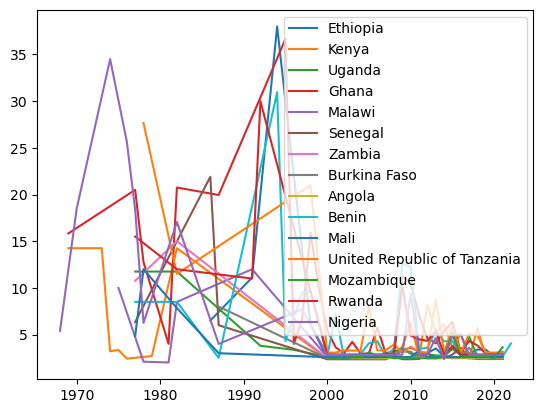

In [7]:
for i in range(len(data_holder)):
    data_test = pd.DataFrame(data_holder[i])
    grouped_data = data_test.groupby("year")
    this_year_mean = grouped_data["loss_percentage"].mean()
    plt.plot(this_year_mean.index, this_year_mean, label = f"{Africa_Country_List[i]}")
    plt.legend()

## 

In [9]:
GDP_Per_Country = pd.read_csv("GDP_data.csv")
GDP_Per_Country_2023 = GDP_Per_Country[["Country Name","Country Code","Indicator Name","Indicator Code","2023"]]
food_country = food_country.rename(columns={"Country":"Country Name"})
combined_2023 = pd.merge(food_country, GDP_Per_Country_2023, how='left', on='Country Name')
combined_2023.dropna(how='any', inplace=True)
combined_2023


,Country Name,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,Country Code,Indicator Name,Indicator Code,2023
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,8367.775731
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,5260.206250
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,46544.720720
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2309.521620
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,ATG,GDP per capita (current US$),NY.GDP.PCAP.CD,21560.215330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Uzbekistan,135,91,3001868,16,515841,28,911881,Very Low Confidence,860,Central Asia,https://www.unep.org/resources/report/unep-foo...,UZB,GDP per capita (current US$),NY.GDP.PCAP.CD,2496.107758
208,Vanuatu,135,91,27296,16,4691,28,8292,Very Low Confidence,548,Melanesia,https://www.unep.org/resources/report/unep-foo...,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,3367.094639
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,4346.768492
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,1369.129365


The correlation between both factors is -0.25


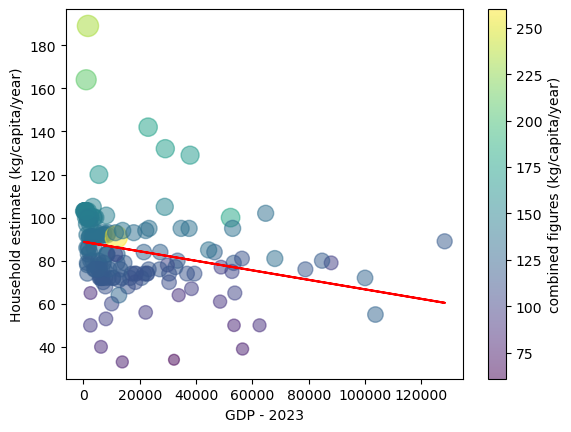

In [10]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='Household estimate (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

x_values = combined_2023['2023']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['Household estimate (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(combined_2023['2023'],regress_values,"r-")

correlation = st.pearsonr(combined_2023['2023'],combined_2023['Household estimate (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.17


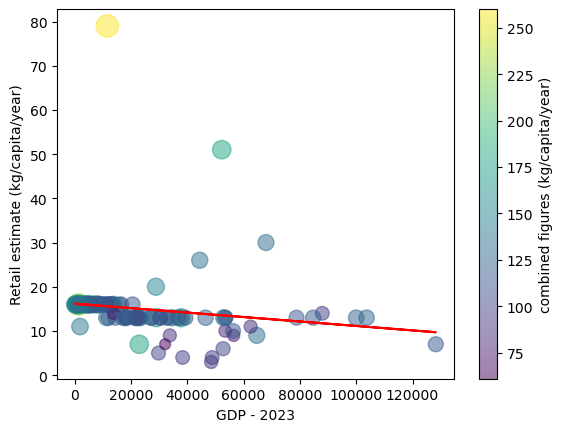

In [11]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='Retail estimate (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['Retail estimate (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,combined_2023['Retail estimate (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.11


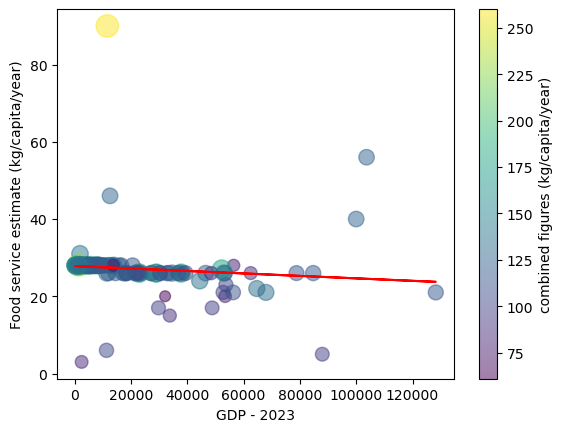

In [13]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='Food service estimate (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['Food service estimate (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,combined_2023['Food service estimate (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.29


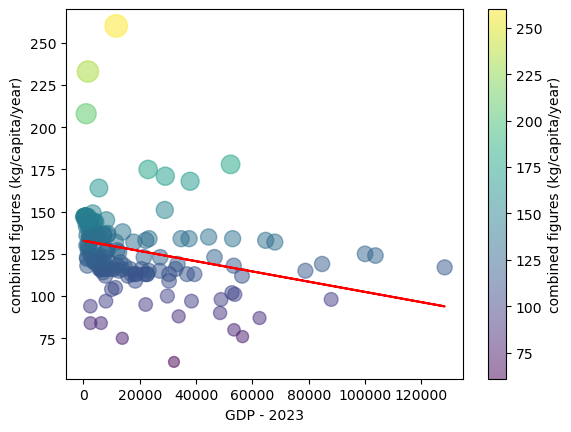

In [14]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='combined figures (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['combined figures (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,combined_2023['combined figures (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [15]:
size_bins = [0, 1000, 5000, 15000, 50000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
GDP_Per_Country_list = GDP_Per_Country[["Country Name","Country Code","Indicator Name","Indicator Code",
                                        "2000","2001","2002","2003","2004","2005","2006","2007","2008",
                                        "2009","2010","2011","2012","2013","2014","2015","2016","2017",
                                        "2018","2019","2020","2021"]]
GDP_Per_Country_list = GDP_Per_Country_list.rename(columns={"Country Name":"country"})
GDP_Per_Country_list["Mean GDP"] = 0.0

for i, row in GDP_Per_Country_list.iterrows():
    count = 0
    total = 0
    for year in range(2000, 2021 + 1):  
        value = row[str(year)]
        if pd.notna(value):
            total += value
            count += 1
    if count > 0:
        GDP_Per_Country_list.at[i, "Mean GDP"] = total / count

GDP_Per_Country_list = GDP_Per_Country_list.dropna(how='any')

In [16]:
food_loss = food_loss[["m49_code",'country','region','cpc_code','commodity','year',
                                'loss_percentage','loss_percentage_original','loss_quantity',
                                'activity1','activity2','food_supply_stage','treatment','cause_of_loss',
                                'sample_size','method_data_collection','reference','url','notes']]
food_loss.loc[food_loss["activity1"] == "Storage", "food_supply_stage"] = "Storage"
food_loss.loc[food_loss["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
food_loss.loc[food_loss["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
food_loss.loc[food_loss["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
food_loss.loc[food_loss["activity1"] == "Drying", "food_supply_stage"] = "Farm"
food_loss.loc[food_loss["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"

blank_rows = food_loss[food_loss['food_supply_stage'].isnull() | (food_loss['food_supply_stage'] == '') & (food_loss['activity1'].isnull())]
blank_rows

food_loss = food_loss.drop(blank_rows.index)
food_loss = food_loss[(food_loss["year"] >= 2000) & (food_loss["year"] <= 2021)]
food_loss_grp = food_loss.groupby(['country', 'food_supply_stage'])

food_loss_mean = food_loss_grp["loss_percentage"].mean()
food_loss_mean = pd.DataFrame(food_loss_mean)
food_loss_mean = food_loss_mean.reset_index()


Farm = []
Harvest = []
Storage = []
Transportation = []

food_loss_mean.head(50)

food_loss_mean["food_supply_stage"].value_counts()

for index, row in food_loss_mean.iterrows():
    if row['food_supply_stage'] == 'Farm':
        Farm.append(row)
    elif row['food_supply_stage'] == 'Harvest':
        Harvest.append(row)    
    elif row['food_supply_stage'] == 'Storage':
        Storage.append(row)
    elif row['food_supply_stage'] == 'Transportation':
        Transportation.append(row)
Farm = pd.DataFrame(Farm)
Farm = pd.merge(Farm,GDP_Per_Country_list, how='left', on='country')
Farm = Farm.dropna(how = 'any')

Harvest = pd.DataFrame(Harvest)
Harvest = pd.merge(Harvest,GDP_Per_Country_list, how='left', on='country')
Harvest = Harvest.dropna(how = 'any')

Storage = pd.DataFrame(Storage)
Storage = pd.merge(Storage,GDP_Per_Country_list, how='left', on='country')
Storage = Storage.dropna(how = 'any')


The correlation between both factors is 0.13


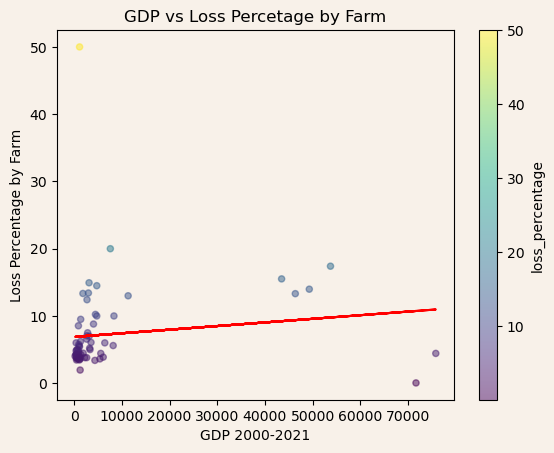

In [97]:
Farm.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',
          ylabel='Loss Percentage by Farm',
          title='GDP vs Loss Percetage by Farm')
x_values = Farm['Mean GDP'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,Farm["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,Farm["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP vs Loss Percetage by Farm.png')

The correlation between both factors is 0.21


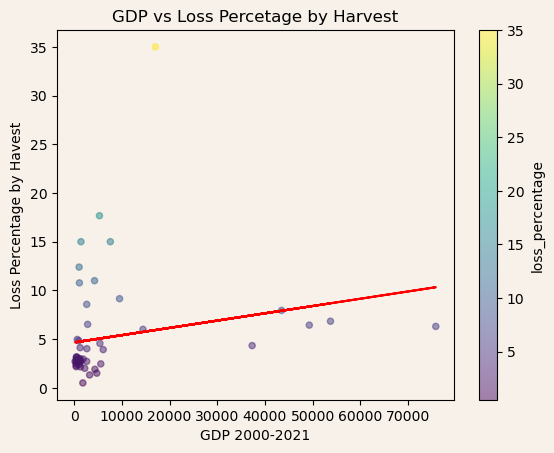

In [99]:
Harvest.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',          
          ylabel='Loss Percentage by Havest',
          title='GDP vs Loss Percetage by Harvest')
x_values = Harvest['Mean GDP'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,Harvest["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,Harvest["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP vs Loss Percetage by Harvest.png')

The correlation between both factors is 0.15


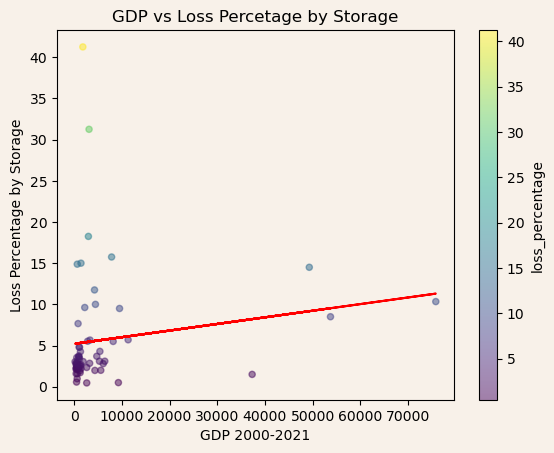

In [100]:
Storage.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',          
          ylabel='Loss Percentage by Storage',
          title='GDP vs Loss Percetage by Storage')
x_values = Storage['Mean GDP'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,Storage["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,Storage["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP vs Loss Percetage by Storage.png')

The correlation between both factors is 0.24


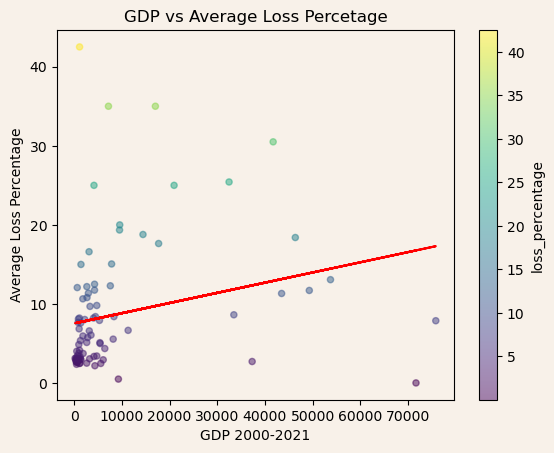

In [105]:


food_loss_by_country = food_loss.groupby('country')
food_loss_by_country = food_loss_by_country["loss_percentage"].mean()
food_loss_by_country = pd.merge(food_loss_by_country,GDP_Per_Country_list, how='left', on='country')
food_loss_by_country = food_loss_by_country.dropna(how = 'any')

food_loss_by_country.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percetage',)
x_values = food_loss_by_country['Mean GDP'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,food_loss_by_country["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,food_loss_by_country["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('GDP vs Average Loss Percetage.png')
